In [87]:
import pandas as pd 
import numpy as np
import os,csv
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing, cross_validation, svm
import tensorflow as tf
from sklearn.grid_search import GridSearchCV
import csv
from sklearn.svm import SVC
from PIL import Image
import pickle

In [123]:
def FAN_vs_Time(num, FAN_table_KID, CPU_table_KID):
    A=[]
    B=[]
    l=len(FAN_table_KID[num])
    k=len(CPU_table_KID[num])

    for i in range(1,l+1):
        A.append(i)

    for i in range(1,k+1):
        B.append(i)

    plt.plot(A,FAN_table_KID[num], label="FAN")
    plt.plot(B,CPU_table_KID[num], label="CPU temperature")
    plt.xlabel("time[s]") 
    plt.ylabel("Fan rotation speed  [%]")
    plt.title('FAN vs time')
    plt.legend()
    plt.show()

In [124]:
new_dfs=pd.read_pickle('/Users/user/Research/output_csvs/new_dfs.pickle')
FAN_table_KID1= pd.read_pickle('/Users/user/Research/output_csvs/FAN_table_KID1.pickle')
CPU_table_KID1= pd.read_pickle('/Users/user/Research/output_csvs/CPU_table_KID1.pickle')
FAN_table_KID3= pd.read_pickle('/Users/user/Research/output_csvs/FAN_table_KID3.pickle')
CPU_table_KID3= pd.read_pickle('/Users/user/Research/output_csvs/CPU_table_KID3.pickle')
FAN_table_KID5= pd.read_pickle('/Users/user/Research/output_csvs/FAN_table_KID5.pickle')
CPU_table_KID5= pd.read_pickle('/Users/user/Research/output_csvs/CPU_table_KID5.pickle')
FAN_table_KID7= pd.read_pickle('/Users/user/Research/output_csvs/FAN_table_KID7.pickle')
CPU_table_KID7= pd.read_pickle('/Users/user/Research/output_csvs/CPU_table_KID7.pickle')
FAN_table_KID9= pd.read_pickle('/Users/user/Research/output_csvs/FAN_table_KID9.pickle')
CPU_table_KID9= pd.read_pickle('/Users/user/Research/output_csvs/CPU_table_KID9.pickle')
FAN_table_KID11= pd.read_pickle('/Users/user/Research/output_csvs/FAN_table_KID11.pickle')
CPU_table_KID11= pd.read_pickle('/Users/user/Research/output_csvs/CPU_table_KID11.pickle')

# Fan Data

In [125]:
from sympy import integrate
x = Symbol('x')
g = log(x)
f = integrate(g)
print (f)

NameError: name 'Symbol' is not defined

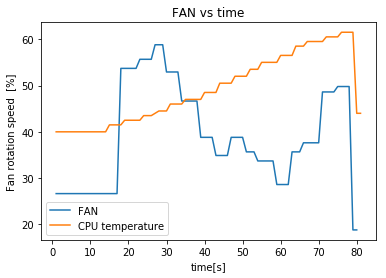

In [126]:
FAN_vs_Time(0, FAN_table_KID11, CPU_table_KID11)

/Users/user/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/matplotlib/legend.py:326: UserWarning: Unrecognized location "uppper right". Falling back on "best"; valid locations are
	upper left
	center left
	right
	lower right
	lower left
	best
	center right
	lower center
	upper center
	center
	upper right

  six.iterkeys(self.codes))))


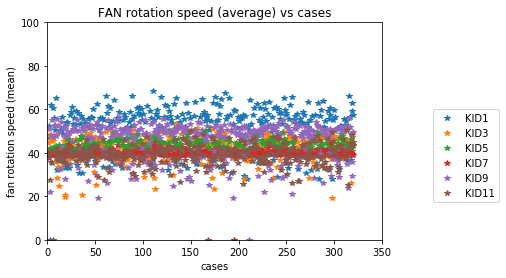

In [108]:
A=[]
l=len(new_dfs['FAN_mean_KID1'])
for i in range(1,l+1):
    A.append(i)

plt.plot(A,new_dfs['FAN_mean_KID1'],"*", label="KID1")
plt.plot(A,new_dfs['FAN_mean_KID3'], "*", label="KID3")
plt.plot(A,new_dfs['FAN_mean_KID5'], "*", label="KID5")
plt.plot(A,new_dfs['FAN_mean_KID7'], "*", label="KID7")
plt.plot(A,new_dfs['FAN_mean_KID9'], "*", label="KID9")
plt.plot(A,new_dfs['FAN_mean_KID11'], "*", label="KID11")

plt.xlabel("cases") 
plt.ylabel("fan rotation speed (mean)")
plt.xlim(0,350)
plt.ylim(0,100)
plt.title('FAN rotation speed (average) vs cases')

plt.legend(loc='uppper right',
           bbox_to_anchor=(1.05, 0.5, 0.3, .100), 
           borderaxespad=0.,)
plt.show()

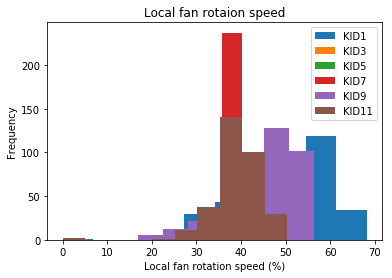

In [117]:
plt.hist(new_dfs['FAN_mean_KID1'])
plt.hist(new_dfs['FAN_mean_KID3'])
plt.hist(new_dfs['FAN_mean_KID5'])
plt.hist(new_dfs['FAN_mean_KID7'])
plt.hist(new_dfs['FAN_mean_KID9'])
plt.hist(new_dfs['FAN_mean_KID11'])

plt.xlabel("Local fan rotation speed (%)") 
plt.ylabel("Frequency")
#plt.xlim(0,350)
#plt.ylim(0,100)
plt.title('Local fan rotaion speed')
labels= ["KID1","KID3", "KID5", "KID7", "KID9", "KID11"]
plt.legend( labels)
'''
plt.legend(loc='uppper right',
           bbox_to_anchor=(1.05, 0.5, 0.3, .100), 
           borderaxespad=0.,)
'''           
           
plt.show()

# Linear Regression


In [94]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
X_temp= new_dfs.drop("CRAC_set", axis=1)
X_temp= X_temp.drop("CRAC_out", axis=1)
X_temp= X_temp.drop("time", axis=1)
Y_temp=X_temp.drop ("temp1", axis=1)
Y_temp=Y_temp.drop("temp2", axis=1)
Y_temp=Y_temp.drop("temp3", axis=1)
#X_temp=X_temp.as_matrix()
Y_temp.head()

,KID1,KID3,KID5,KID7,KID9,KID11,CPU_mean_KID1,FAN_mean_KID1,CPU_mean_KID3,FAN_mean_KID3,CPU_mean_KID5,FAN_mean_KID5,CPU_mean_KID7,FAN_mean_KID7,CPU_mean_KID9,FAN_mean_KID9,CPU_mean_KID11,FAN_mean_KID11
1,7,11,3,10,9,23,51.347059,47.483452,50.382353,44.502262,40.142857,39.763735,44.402439,39.927222,51.598765,51.623750,49.135802,39.151625
2,11,22,10,19,21,4,51.467391,52.370659,50.116667,47.985169,46.483333,41.789888,43.853933,38.996818,50.772727,51.127816,41.205556,37.561461
3,20,24,4,14,0,1,0.000000,0.000000,47.750000,39.364384,41.118557,39.185104,43.311828,39.372174,40.436782,21.995581,40.000000,27.666667
4,22,3,16,17,19,5,49.752475,62.164300,41.638614,45.794300,47.398990,42.232551,44.312500,38.991053,50.601124,48.268636,41.918539,35.685876
5,4,22,14,11,8,7,49.064356,35.303800,49.412371,45.775104,46.547368,39.834787,43.708791,40.019444,50.089888,54.943295,43.821429,40.844096


In [95]:
X=Y_temp.as_matrix()
Y=FAN_KID1_mean
clf.fit(X, Y)
 
# 回帰係数
print(clf.coef_)

# 決定係数
print(clf.score(X, Y))

# 偏回帰係数
print(pd.DataFrame({"Name":Y_temp.columns,
                   "Coefficients":clf.coef_}).sort_values(by='Coefficients') )
 
# 切片 (誤差)
print(clf.intercept_)

Predicted_FAN=[]
for i in range(len(X)):
    g=clf.predict(X[i])
    Predicted_FAN.append(g)
    print(g)

/Users/user/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


[ -1.09484570e-16  -3.33066907e-16   2.77555756e-16   1.59594560e-16
  -2.77555756e-17   0.00000000e+00   2.63677968e-16   1.00000000e+00
   0.00000000e+00   1.66533454e-16  -3.46944695e-17   3.46944695e-17
   2.08166817e-17   2.42861287e-17  -5.55111512e-17   2.49800181e-16
  -1.38777878e-17  -6.59194921e-17]
1.0
    Coefficients            Name
1  -3.330669e-16            KID3
0  -1.094846e-16            KID1
17 -6.591949e-17  FAN_mean_KID11
14 -5.551115e-17   CPU_mean_KID9
10 -3.469447e-17   CPU_mean_KID5
4  -2.775558e-17            KID9
16 -1.387779e-17  CPU_mean_KID11
5   0.000000e+00           KID11
8   0.000000e+00   CPU_mean_KID3
12  2.081668e-17   CPU_mean_KID7
13  2.428613e-17   FAN_mean_KID7
11  3.469447e-17   FAN_mean_KID5
3   1.595946e-16            KID7
9   1.665335e-16   FAN_mean_KID3
15  2.498002e-16   FAN_mean_KID9
6   2.636780e-16   CPU_mean_KID1
2   2.775558e-16            KID5
7   1.000000e+00   FAN_mean_KID1
-4.26325641456e-14
[ 47.48345238]
[ 52.37065934]
[ -4.025

/Users/user/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/user/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/user/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has

/Users/user/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


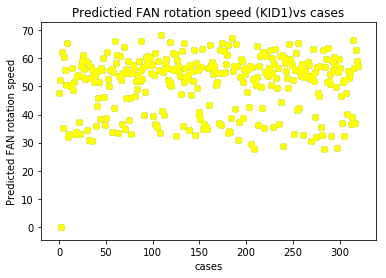

In [96]:
cases=[]
for i in range(len(Y)):
    cases.append(i)
    
plt.scatter(cases, Predicted_FAN)
plt.scatter(cases, Y, c="yellow")
plt.xlabel("cases") 
plt.ylabel("Predicted FAN rotation speed")
plt.title('Predictied FAN rotation speed (KID1)vs cases')

plt.legend()
plt.show()

誤差の平均値: [  5.27722914e-15]


/Users/user/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


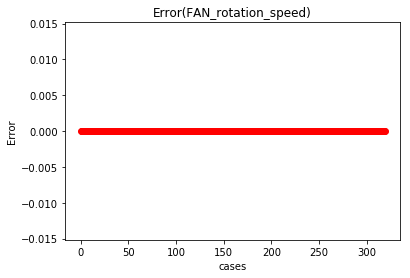

In [97]:
Error=[]
Error_abs=[]
for i in range(len(Y)):    
    e=Predicted_FAN[i]-Y[i]
    Error.append(e)
    f=abs(e)
    Error_abs.append(f)

#Errorの平均値   
print("誤差の平均値:", sum(Error_abs)/len(Error_abs))
plt.scatter(cases, Error, c="red")
plt.xlabel("cases") 
plt.ylabel("Error")
plt.title('Error(FAN_rotation_speed)')

plt.legend()
plt.show()

# SVR

In [98]:
# 3：データの整形-------------------------------------------------------
sc=preprocessing.StandardScaler()
sc.fit(X)
X=sc.transform(X)

# 4：学習データとテストデータに分割する-------------------------------
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.2, random_state=0)
#X_train は256 X_testは64.   Y_trainは256 Y_testは64

/Users/user/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [99]:
#SVR linear Regressor (RBF) を適用する-------------------------------------------
clf_svr = svm.SVR(kernel='rbf', C=1000, gamma=0.001)
#clf_svr = svm.SVR(kernel='rbf', C=1000, epsilon=2.0, gamma=0.001)
clf_svr.fit(X_train, Y_train)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [100]:
# 8：誤差-------------------------------------------------
Y_pred_svr_rbf=clf_svr.predict(X_test)
print("「SVRの平均二乗誤差」")
RMS_svr=np.mean((Y_pred_svr_rbf - Y_test) ** 2)
print(RMS_svr)

「SVRの平均二乗誤差」
153.546356307


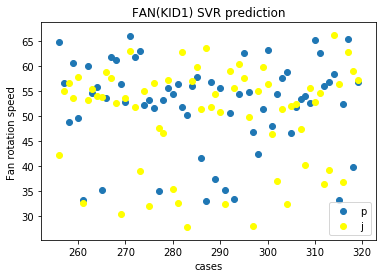

In [101]:
#FAN1
cases=[]
for i in range(256,320):
    cases.append(i)
    
plt.scatter(cases, Y_pred_svr_rbf)
plt.scatter(cases, Y[256:320], c="yellow")
plt.xlabel("cases") 
plt.ylabel("Fan rotation speed ")
plt.title('FAN(KID1) SVR prediction')

plt.legend("pj")
plt.show()